In [1]:
import pandas as pd
from nsepy import get_history as gh
import datetime as dt
import yfinance as yf

In [2]:
import datetime as dt

start = dt.datetime(2021, 7, 1)
end = dt.datetime(2022, 1, 27)
symbol = 'HDFCBANK.NS'  # Stock symbol in uppercase

stock_data = yf.download(symbol, start=start, end=end)
stock_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-01,1502.000000,1502.000000,1483.000000,1486.750000,1433.425293,8455721
2021-07-02,1485.000000,1489.250000,1477.000000,1480.400024,1427.303101,7413518
2021-07-05,1489.949951,1504.500000,1484.550049,1495.449951,1441.813232,3686941
2021-07-06,1497.000000,1540.000000,1496.000000,1534.699951,1479.655518,8834516
2021-07-07,1534.000000,1545.349976,1527.699951,1539.500000,1484.283325,4814595
...,...,...,...,...,...,...
2022-01-19,1534.000000,1539.750000,1513.349976,1518.449951,1463.988159,7158813
2022-01-20,1528.449951,1528.500000,1500.099976,1509.000000,1454.877319,7598923
2022-01-21,1500.000000,1529.800049,1485.599976,1521.599976,1467.025391,5768847


In [3]:
stock_data =stock_data[['Open','High','Low','Close']]
stock_data

,Open,High,Low,Close
Date,,,,
2021-07-01,1502.000000,1502.000000,1483.000000,1486.750000
2021-07-02,1485.000000,1489.250000,1477.000000,1480.400024
2021-07-05,1489.949951,1504.500000,1484.550049,1495.449951
2021-07-06,1497.000000,1540.000000,1496.000000,1534.699951
2021-07-07,1534.000000,1545.349976,1527.699951,1539.500000
...,...,...,...,...
2022-01-19,1534.000000,1539.750000,1513.349976,1518.449951
2022-01-20,1528.449951,1528.500000,1500.099976,1509.000000
2022-01-21,1500.000000,1529.800049,1485.599976,1521.599976


In [4]:
column ='Close'

In [5]:
from sklearn.preprocessing import MinMaxScaler
Ms= MinMaxScaler()
data = Ms.fit_transform(stock_data[[column]])
print("Length of the data {} and Shape of data {}".format(len(data),data.shape))

Length of the data 143 and Shape of data (143, 1)


In [6]:
# training_size = round(len(data)*0.80)
# print("Training data size:", training_size)
# X_train=data[:training_size]
# X_test=data[training_size:]
# print("X_train length:",X_train.shape)
# print("X_test length:",X_test.shape)

# Y_train=data[:training_size]
# Y_test=data[training_size:]
# print("Y_train length:",Y_train.shape)
# print("Y_test length:",Y_test.shape)

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
from sklearn.metrics import mean_squared_error
# trends = ['n','t','c','ct']
orders = [(1,0,2),(1,0,1),(2,0,1),(1,0,1)]

from statsmodels.tsa.arima.model import ARIMA
for i in orders:
    model = ARIMA(data,order =i)
    model_fit=model.fit()
    
    test_pred = model_fit.predict(0,len(data)-1)
    test_pred
    
#     from sklearn.metrics import r2_score
#     mse = mean_squared_error(Y_test,test_pred,squared =False)
    
    from functions import rmsemape
    print("Order ={}".format(i))
    rmsemape(data,test_pred)
    print("*****************")

Order =(1, 0, 2)
RMSE-Testset: 0.0658199279398293
maPe-Testset: 3178229281061.1216
*****************
Order =(1, 0, 1)
RMSE-Testset: 0.06591671993003505
maPe-Testset: 3171869858477.6978
*****************
Order =(2, 0, 1)
RMSE-Testset: 0.06437251629433173
maPe-Testset: 2983166337990.4844
*****************
Order =(1, 0, 1)
RMSE-Testset: 0.06591671993003505
maPe-Testset: 3171869858477.6978
*****************


C:\Users\kathi\anaconda3\envs\tsa\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
len(test_pred)

143

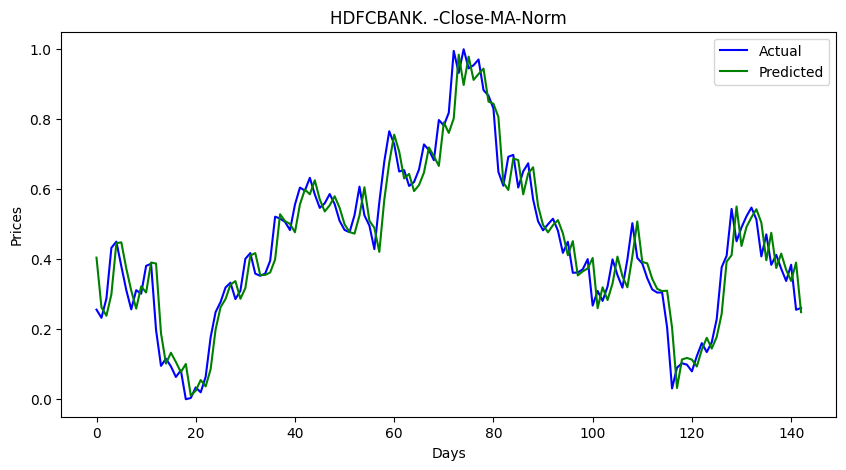

In [10]:
from functions import graph
graph(data,test_pred,"Actual","Predicted","HDFCBANK. -Close-MA-Norm","Days","Prices")

In [11]:
from functions import conversionSingle
aTestNormTable = conversionSingle(data,['Close'])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
# actual_stock_price_test_ori
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,['Close'])
actual_stock_price_test_oriA

,Close
0,1486.75
1,1480.400024
2,1495.449951
3,1534.699951
4,1539.5
...,...
138,1518.449951
139,1509.0
140,1521.599976
141,1486.650024


In [12]:
# from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(test_pred,['Close'])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,['Close'])

In [13]:
predicted_stock_price_test_oriP

,Close
0,1527.093427
1,1488.551145
2,1482.044023
3,1498.626692
4,1538.231935
...,...
138,1530.244645
139,1517.628085
140,1509.035398
141,1523.270602


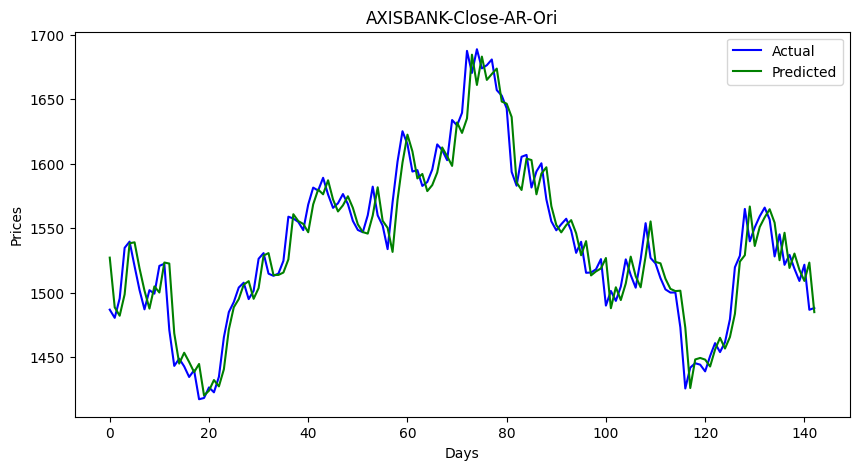

In [14]:
# from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","AXISBANK-Close-AR-Ori","Days","Prices")

In [15]:
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)


RMSE-Testset: 17.889791351831825
maPe-Testset: 0.008982778847791757


In [16]:
forecast=model_fit.predict(len(data), len(data)+30)
forecast

array([0.26976139, 0.27705118, 0.2839467 , 0.29046927, 0.29663907,
       0.30247517, 0.30799562, 0.3132175 , 0.31815695, 0.32282925,
       0.32724885, 0.33142942, 0.33538387, 0.33912445, 0.34266272,
       0.34600962, 0.3491755 , 0.35217016, 0.35500284, 0.35768233,
       0.36021689, 0.36261437, 0.36488218, 0.36702733, 0.36905646,
       0.37097585, 0.37279143, 0.37450881, 0.37613331, 0.37766994,
       0.37912347])

In [17]:
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [18]:
forecast_stock_price_test_oriF

,Closefore
0,1490.513265
1,1492.491712
2,1494.363155
3,1496.13338
4,1497.807863
5,1499.39178
6,1500.890031
7,1502.307248
8,1503.647815
9,1504.915877


In [19]:
forecast_stock_price_test_oriF.to_csv("CloseARMA.csv",index=False)


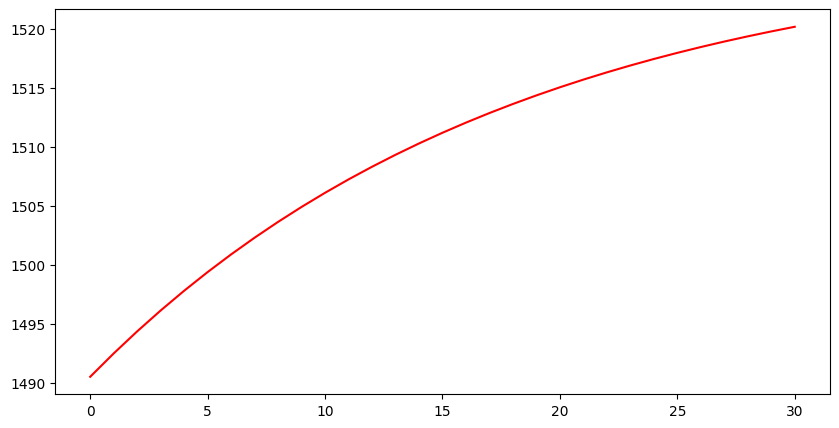

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[200:145], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")